In [1]:
import os

In [37]:
%pwd

'c:\\Users\\Lenovo\\Desktop\\stb_pfe_mlflow'

In [3]:
os.chdir("../")

In [15]:
%pwd

'c:\\Users\\Lenovo\\Desktop\\stb_pfe_mlflow'

In [16]:
import pandas as pd

In [38]:
df= pd.read_csv("artifacts/data_ingestion/data.csv")
df.head()

,tiers_key,ca,TOTMVTC,TOTMVTD,TOTMVTCnet,TOTMVTDnet,ENG,MontImp,encours,Encours_Moyen_Debiteur,...,Code_Classe,Var Signalitiques.Code_Profession,Var Signalitiques.Profession,Var Signalitiques.Code_Activite_Economique,Var Signalitiques.Activite_Economique,Var Signalitiques.Code_secteur_activite,Var Signalitiques.Secteur_Activite,Var Signalitiques.Ville,Var Signalitiques.Code_Postal,Var Signalitiques.Date_Ouverture
0,174,NaN,0.000,-274.956,0.000,-261.171,NaN,NaN,NaN,1420.500876,...,1.0,NaN,NaN,HAB99,TRANSPORTS FERROVIAIRES DE FRET,HA,TRANSPORTS ET ENTREPOSAGE,BAB BHAR,1000.0,1958-04-05
1,370,NaN,0.000,-483.776,0.000,-450.691,NaN,NaN,NaN,2311.483331,...,1.0,NaN,NaN,GCG99,AUTRES COMMERCES DE DETAIL DE BIENS NEUFS EN M...,NaN,NaN,TUNIS,1002.0,1992-04-14
2,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,DAA04,COMMERCE D'ELECTRICITE,DA,"PRODUCTION ET DISTRIBUTION D'ELECTRICITE, DE G...",TUNIS BELVEDERE,1002.0,2000-01-01
3,578,NaN,0.000,-362.465,0.000,-341.152,NaN,NaN,NaN,1500.732704,...,NaN,NaN,NaN,CWA01,FABRICATION DE MEUBLES DE BUREAU ET DE MAGASIN,CW,INDUSTRIE MANUFACTURIERE,TUNIS BELVEDERE,1002.0,1992-05-07
4,633,3171.408,3224.323,-7610.750,3224.323,-7610.750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GBG05,COMMERCE DE GROS DE QUINCAILLERIE ET FOURNITUR...,GB,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,REPUBLIQUE,1001.0,1992-02-20


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   tiers_key                                   12946 non-null  int64  
 1   ca                                          6396 non-null   float64
 2   TOTMVTC                                     10205 non-null  float64
 3   TOTMVTD                                     10205 non-null  float64
 4   TOTMVTCnet                                  10045 non-null  float64
 5   TOTMVTDnet                                  10045 non-null  float64
 6   ENG                                         4146 non-null   object 
 7   MontImp                                     4146 non-null   float64
 8   encours                                     4146 non-null   object 
 9   Encours_Moyen_Debiteur                      10076 non-null  float64
 10  Encours_Mo

In [40]:
df.isnull().sum()

tiers_key                                         0
ca                                             6550
TOTMVTC                                        2741
TOTMVTD                                        2741
TOTMVTCnet                                     2901
TOTMVTDnet                                     2901
ENG                                            8800
MontImp                                        8800
encours                                        8800
Encours_Moyen_Debiteur                         2870
Encours_Moyen_crediteur                        2351
INCIDENTCHQ                                   12083
INCIDENTCHQ_R                                 12365
INCIDENTCHQ_N_R                               12369
Interdit                                      10926
InterditAct                                   10887
NBIMP                                         11656
Interet_Non_ECHU                              10533
Encaiss_Recu                                  10411
NBECHEANCE  

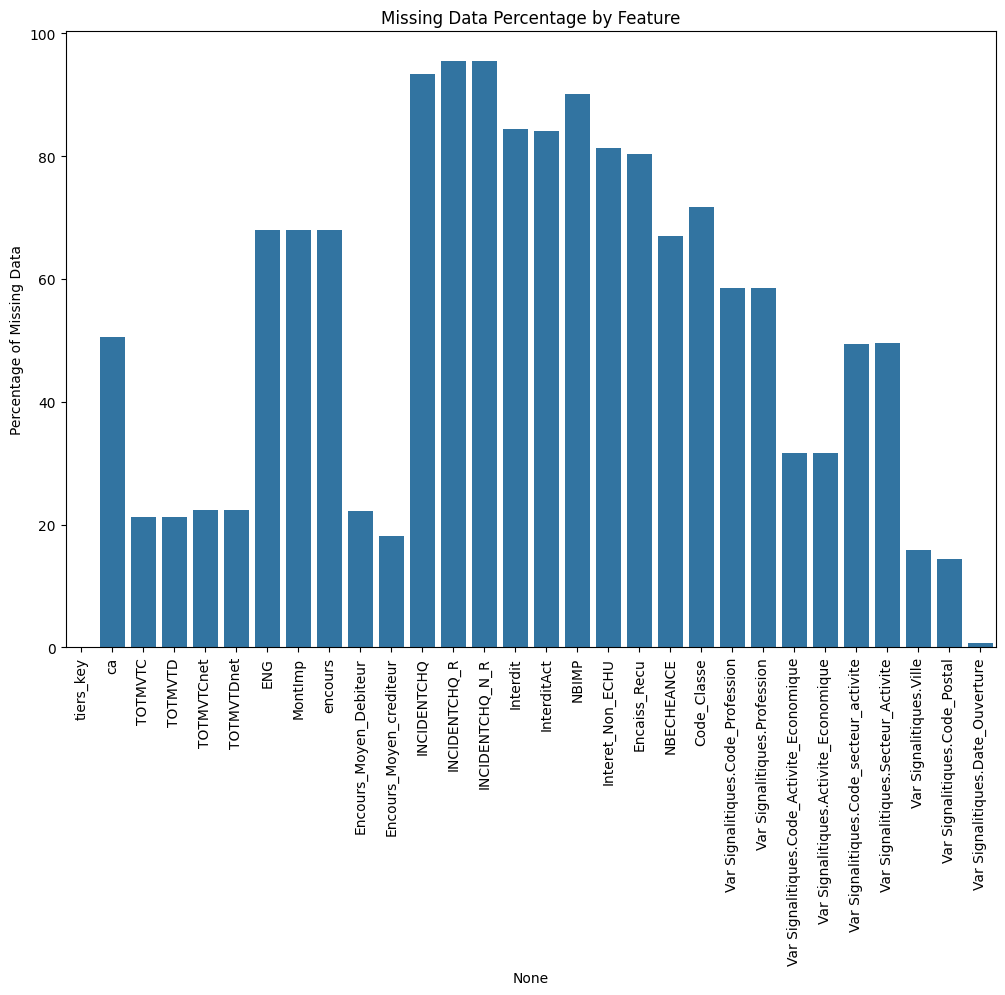

INCIDENTCHQ_N_R                               95.543025
INCIDENTCHQ_R                                 95.512127
INCIDENTCHQ                                   93.333848
NBIMP                                         90.035532
Interdit                                      84.396725
InterditAct                                   84.095474
Interet_Non_ECHU                              81.361038
Encaiss_Recu                                  80.418662
Code_Classe                                   71.643751
MontImp                                       67.974664
encours                                       67.974664
ENG                                           67.974664
NBECHEANCE                                    66.970493
Var Signalitiques.Profession                  58.581801
Var Signalitiques.Code_Profession             58.581801
ca                                            50.594778
Var Signalitiques.Secteur_Activite            49.629229
Var Signalitiques.Code_secteur_activite       49

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing data for each column
missing_data = df.isnull().mean() * 100

# Plot the missing data
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data Percentage by Feature')
plt.show()

# Display columns with more than 30% missing data
missing_data[missing_data > 30].sort_values(ascending=False)


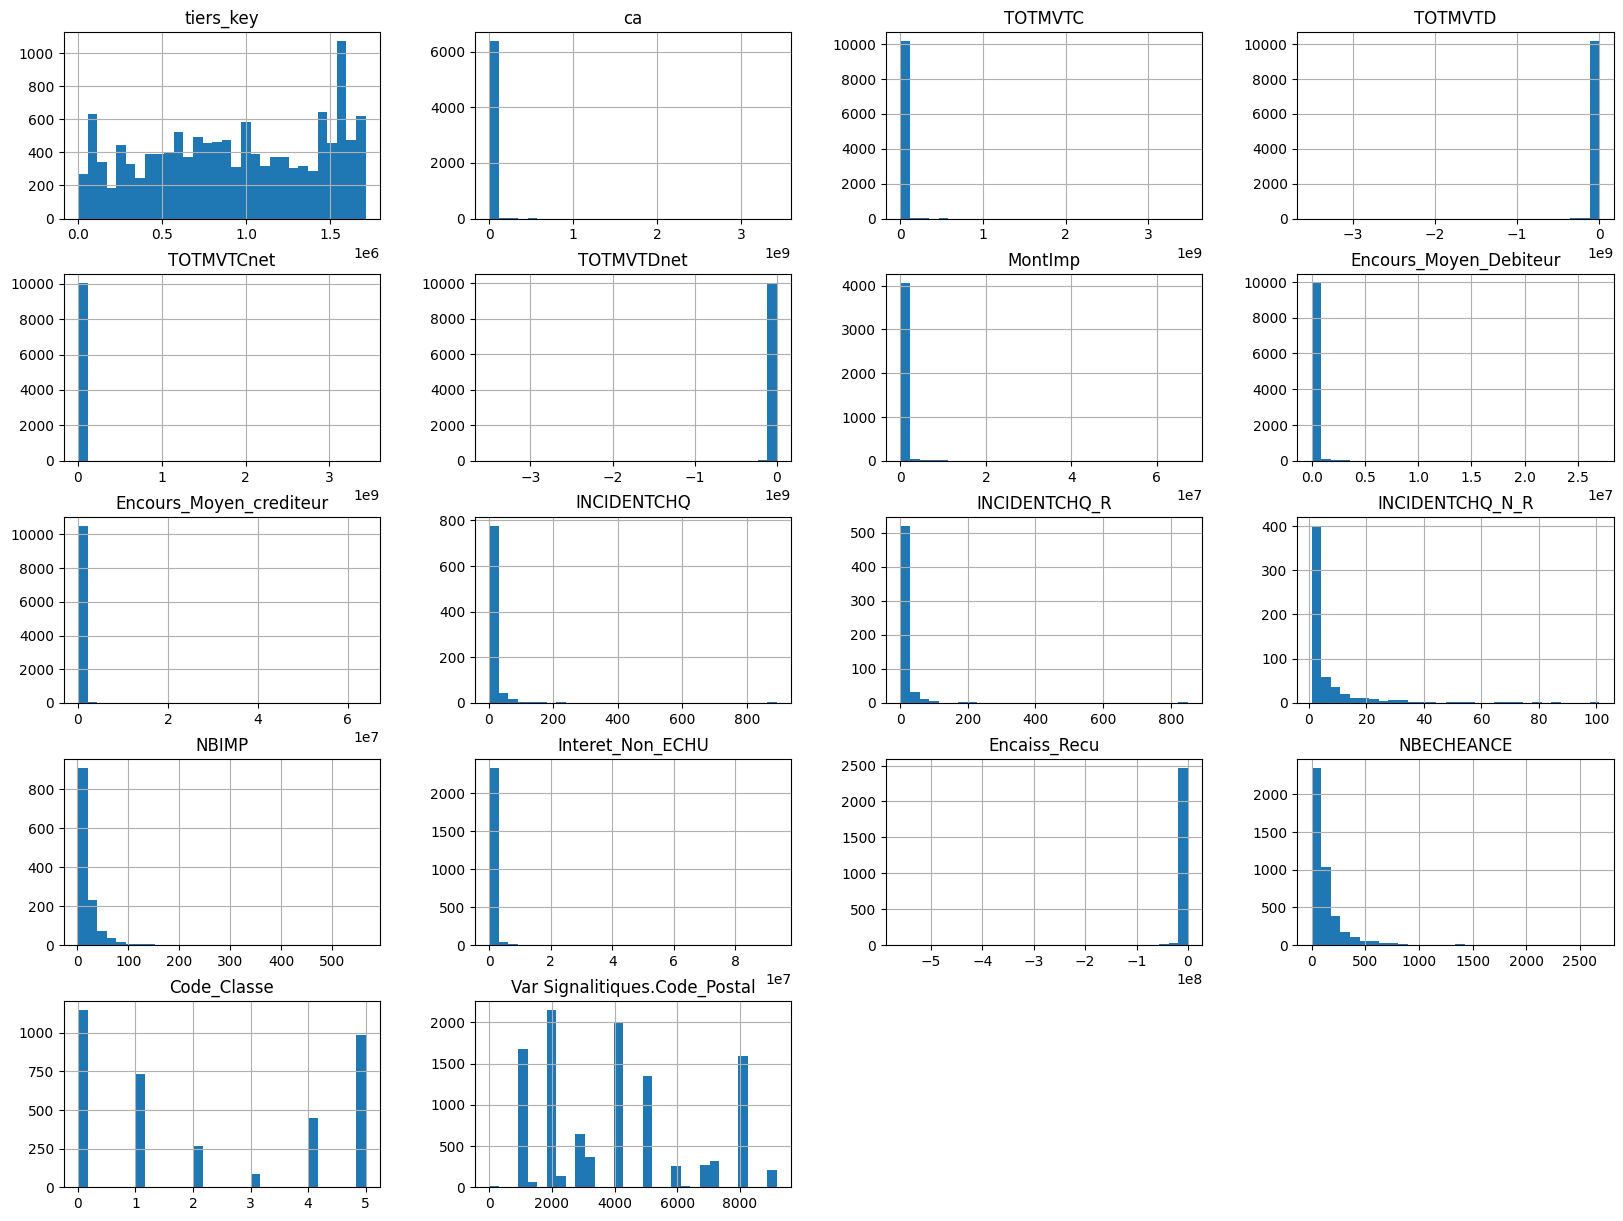

In [42]:
# Distribution des variables numériques
df.hist(bins=30, figsize=(20, 15))
plt.show()

In [49]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [50]:
from stb_pfe_mlflow.constants import *
from stb_pfe_mlflow.utils.common import read_yaml, create_directories

In [51]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [52]:
import os
import urllib.request as request

from stb_pfe_mlflow import logger
from stb_pfe_mlflow.utils.common import get_size

In [53]:
class DataValiadtion:
    def __init__(self, config: DataValidationConfig):
        self.config = config


    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)

            all_schema = self.config.all_schema.keys()

            
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e



In [57]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValiadtion(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-09-10 00:14:57,551: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-09-10 00:14:57,552: INFO: common: yaml file: params.yaml loaded successfully]
[2024-09-10 00:14:57,556: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-09-10 00:14:57,558: INFO: common: created directory at: artifacts]
[2024-09-10 00:14:57,560: INFO: common: created directory at: artifacts/data_validation]
